# Importing needed modules and defining functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
def exp_Line(x, A, mu):
    """returns A * e^(mu*x)"""
    return A*np.e**(mu*x)

def exp_LineAlt(x, mu):
    """returns 8.12 * e^(mu*x)"""
    return 8.12 * np.e**(mu*x)

In [3]:
# import Rates vs Lead thickness. Convert thickness from mm to cm

fileData = np.genfromtxt("Co60_Pb.csv", delimiter=",", skiprows=2)

leadThicks = .1 * fileData[:,0]
leadRates = fileData[:,1]
leadStdDev = fileData[:,2]

# Lead Absorbtion

In [4]:
# creates parameters of best fit decay curve for data (NOT fixed at y-intercept).

leadConstants, leadVariances = curve_fit(exp_Line, leadThicks, leadRates, sigma=leadStdDev)

lead_A = leadConstants[0]
lead_mu = leadConstants[1]

lead95CI = np.array([np.sqrt(leadVariances[0,0]), np.sqrt(leadVariances[1,1])])

In [5]:
# creates parameters of best fit decay curve for data (IS fixed at y-intercept).

leadAltConstants, leadAltVariances = curve_fit(exp_LineAlt, leadThicks, leadRates, sigma=leadStdDev)

leadAlt_A = 8.12
leadAlt_mu = leadAltConstants[0]

leadAlt95CI = np.sqrt(leadAltVariances[0])

In [6]:
#creates arrays of plottable x & y data for the best fit curve

line1_x = np.linspace(-.1, 1.3, 12*100)
line1_y = exp_Line(line1_x, lead_A, lead_mu)

lineAlt_x = line1_x
lineAlt_y = exp_LineAlt(lineAlt_x, leadAlt_mu)

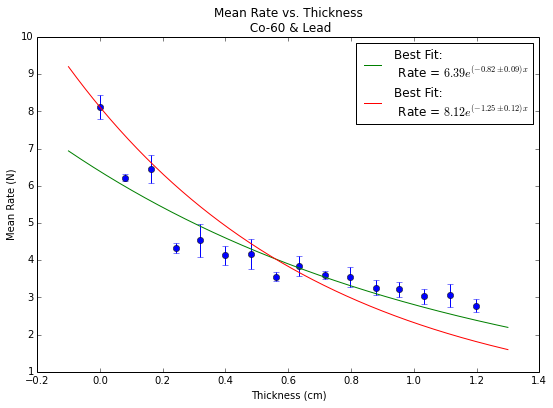

In [7]:
fig1 = plt.figure(figsize=(9,6))
plt.errorbar(leadThicks, leadRates, xerr=None, yerr=leadStdDev, fmt="bo ")
plt.plot(line1_x, line1_y, 'g-',\
         label="Best Fit: \n Rate = $%0.2fe^{(%0.2f \pm %0.2f)x}$"%(lead_A, lead_mu, lead95CI[1]) )
plt.plot(lineAlt_x, lineAlt_y, 'r-', \
         label="Best Fit: \n Rate = $%0.2fe^{(%0.2f \pm %0.2f)x}$"%(leadAlt_A, leadAlt_mu, leadAlt95CI))
plt.title("Mean Rate vs. Thickness \n Co-60 & Lead")
plt.ylabel("Mean Rate (N)")
plt.xlabel("Thickness (cm)")
plt.legend()
plt.show()

## Lead (Corrected)

Because the data is a bad fit, and because the lead will block the beta completely with after very small depths, lets ignore the first 3 data points and try the analysis again.

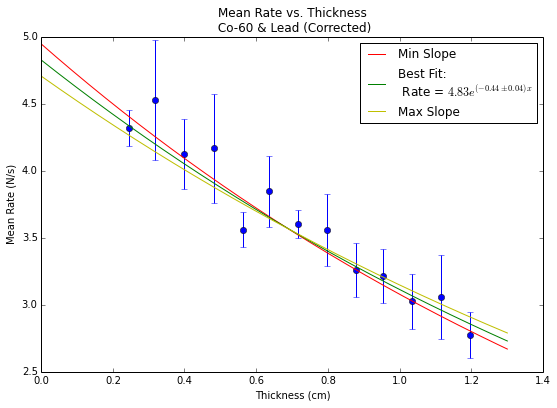

In [8]:
fileData = np.genfromtxt("Co60_Pb.csv", delimiter=",", skiprows=5)

leadCorrectThicks = .1 * fileData[:,0]
leadCorrectRates = fileData[:,1]
leadCorrectStdDev = fileData[:,2]

leadConstants, leadVariances = curve_fit(exp_Line, leadCorrectThicks, leadCorrectRates, sigma=leadCorrectStdDev)

leadCorrect_A = leadConstants[0]
leadCorrect_mu = leadConstants[1]

leadCorrect95CI = np.array([np.sqrt(leadVariances[0,0]), np.sqrt(leadVariances[1,1])])

line2_x = np.linspace(0, 1.3, 12*100)
line2_y = exp_Line(line2_x, leadCorrect_A, leadCorrect_mu)

line2Min_y = exp_Line(line2_x, leadCorrect_A + leadCorrect95CI[0], leadCorrect_mu - leadCorrect95CI[1])
line2Max_y = exp_Line(line2_x, leadCorrect_A - leadCorrect95CI[0], leadCorrect_mu + leadCorrect95CI[1])

fig2 = plt.figure(figsize=(9,6))
plt.errorbar(leadCorrectThicks, leadCorrectRates, xerr=None, yerr=leadCorrectStdDev, fmt="bo ")
plt.plot(line2_x, line2Min_y, 'r-', label="Min Slope")
plt.plot(line2_x, line2_y, 'g-', label="Best Fit: \n Rate = $%0.2fe^{(%0.2f \pm %0.2f)x}$"%\
         (leadCorrect_A, leadCorrect_mu, leadCorrect95CI[1]) )
plt.plot(line2_x, line2Max_y, 'y-', label="Max Slope")
plt.title("Mean Rate vs. Thickness \n Co-60 & Lead (Corrected)")
plt.ylabel("Mean Rate (N/s)")
plt.xlabel("Thickness (cm)")
plt.legend()
plt.show()

# Aluminum Absorbtion

The wide variance in our readings compared to the small amount of signal reduction observed make this an, at best, unreliable data sample. Further thicknesses of aluminum should be used to get a more indicative sample. Never the less, here are the results.

In [9]:
# import Rates vs Aluminum thickness. Convert thickness from mm to cm

fileData = np.genfromtxt("Co60_Al.csv", delimiter=",", skiprows=1)

alumThicks = .1 * fileData[:,0]
alumRates = fileData[:,1]
alumStdDev = fileData[:,2]

In [10]:
# creates parameters of best fit decay curve for data 

alumConstants, alumVariances = curve_fit(exp_Line, alumThicks, alumRates, sigma=alumStdDev)

alum_A = alumConstants[0]
alum_mu = alumConstants[1]

alum95CI = np.array([np.sqrt(alumVariances[0,0]), np.sqrt(alumVariances[1,1])])

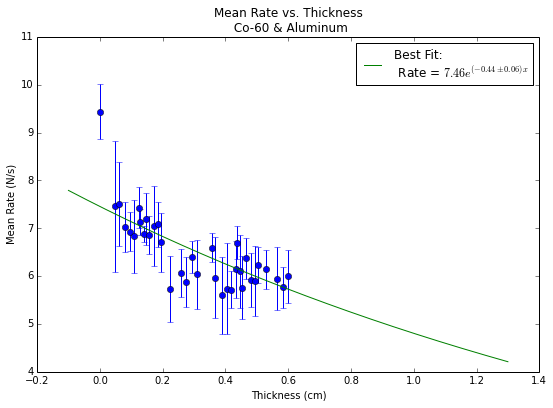

In [11]:
#plots the aluminum absorbtion data with the best fit line

line1_x = np.linspace(-.1, 1.3, 12*100)
line1_y = exp_Line(line1_x, alum_A, alum_mu)

fig3 = plt.figure(figsize=(9,6))
plt.errorbar(alumThicks, alumRates, xerr=None, yerr=alumStdDev, fmt="bo ")
plt.plot(line1_x, line1_y, 'g-',\
         label="Best Fit: \n Rate = $%0.2fe^{(%0.2f \pm %0.2f)x}$"%(alum_A, alum_mu, alum95CI[1]) )
plt.title("Mean Rate vs. Thickness \n Co-60 & Aluminum")
plt.ylabel("Mean Rate (N/s)")
plt.xlabel("Thickness (cm)")
plt.legend()
plt.show()

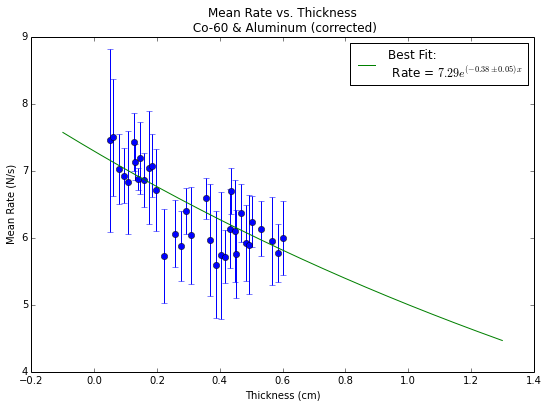

In [12]:
#excludes first data point due to it appearing as if it is mostly beta radiation and
#the following readings as mostly gamma

fileData = np.genfromtxt("Co60_Al.csv", delimiter=",", skiprows=2)

alumThicks = .1 * fileData[:,0]
alumRates = fileData[:,1]
alumStdDev = fileData[:,2]


alumConstants, alumVariances = curve_fit(exp_Line, alumThicks, alumRates, sigma=alumStdDev)
alum_A = alumConstants[0]
alum_mu = alumConstants[1]
alum95CI = np.array([np.sqrt(alumVariances[0,0]), np.sqrt(alumVariances[1,1])])

line1_x = np.linspace(-.1, 1.3, 12*100)
line1_y = exp_Line(line1_x, alum_A, alum_mu)

fig4 = plt.figure(figsize=(9,6))
plt.errorbar(alumThicks, alumRates, xerr=None, yerr=alumStdDev, fmt="bo ")
plt.plot(line1_x, line1_y, 'g-',\
         label="Best Fit: \n Rate = $%0.2fe^{(%0.2f \pm %0.2f)x}$"%(alum_A, alum_mu, alum95CI[1]) )
plt.title("Mean Rate vs. Thickness \n Co-60 & Aluminum (corrected)")
plt.ylabel("Mean Rate (N/s)")
plt.xlabel("Thickness (cm)")
plt.legend()
plt.show()

In [13]:
# Percent error of Aluminum from NIST value
print(round(100 * (.380-.148)/.148, 2), "%")

156.76 %
